## SolarForecast - predict brightness for the next two days (rest of today + tomorrow)

In [ ]:
# load libraries

import numpy as np
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt

import pickle


In [ ]:
# load dataset - select only the last 40 records (today + tomorrow) descending
cnx = create_engine('mysql+pymysql://<<dbuser>>:<<password>>@<<hostname>>:<<port>>/fhem', echo=False, future=True)
query = "select * from (select Brightness, Year, Month, Day, Hour, Rad1h, RRad1, SunAlt, SunAz, SunD1, CloudCover from SolarEnergyFc order by Year desc, Month desc, Day desc, Hour desc limit 40) AS subselect order by Year asc, Month asc, Day asc, Hour asc"

with cnx.connect() as conn:
  result = conn.execute(text(query))
  rows = result.fetchall()
  data = np.array(rows)

data = np.hstack((data, np.zeros((data.shape[0], 3), dtype=bool)))

data[:,11] = np.where((data[:,2]>=11) | (data[:,2]<=2), True, False)
data[:,12] = np.where((data[:,2]==3) | (data[:,2]==4) | (data[:,2]==9) | (data[:,2]==10), True, False)
data[:,13] = np.where((data[:,2]>=6) & (data[:,2]<=8), True, False)

X = data[:, [5,6,7,8,9,10,11,12,13]]
y = data[:,[0]].flatten()


In [5]:
# load model and predict the next two days
filename = './models/brightness.pkl'
model = pickle.load(open(filename, 'rb'))

y_pred = model.predict(X)

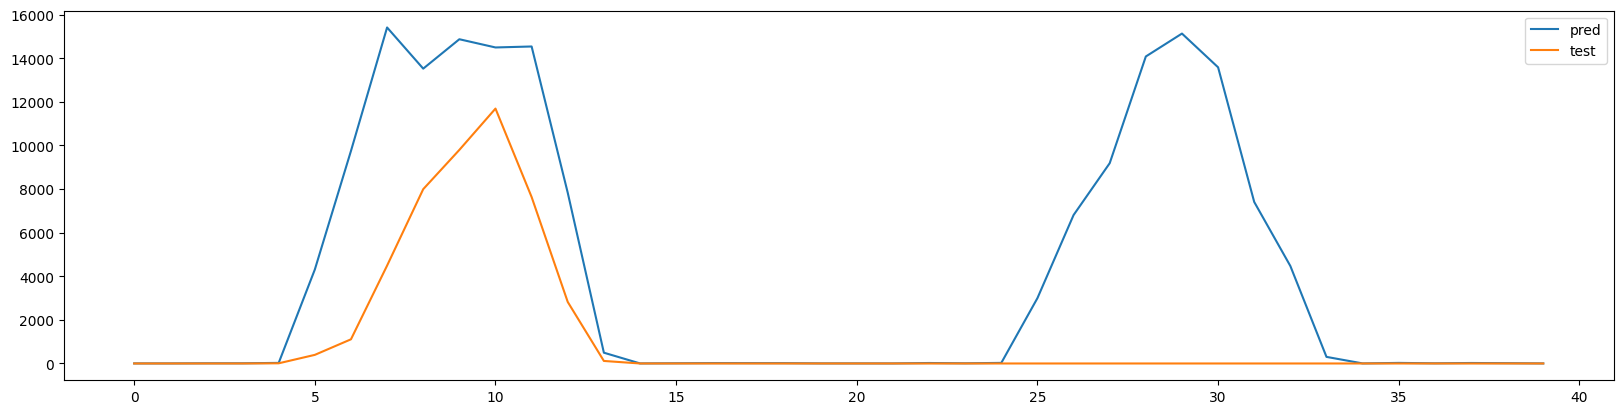

In [6]:
# print comparision
plt.figure().set_figwidth(20)
plt.plot(y_pred, label='pred')
plt.plot(y, label='test')
plt.legend()
plt.show()

In [ ]:

# print the detailed values descending to compare the actuals (data[i,0]) with predicted values (Target)
for i in reversed(range(len(y_pred))):
    row = data[i]

    #if data[i,0] > 0:
    #    break
    
    Year = int(data[i,1])
    Month = int(data[i,2])
    Day = int(data[i,3])
    Hour = int(data[i,4])

    Target = 0

    if data[i,5] > 0:

        Target =  int(y_pred[i])
        with cnx.connect() as conn:
            conn.execute(text("call saveBrightnessHourFc(:Year, :Month, :Day, :Hour, :Target)"), {'Year': Year, 'Month': Month, 'Day': Day, 'Hour': Hour, 'Target': Target})
            conn.commit()
    
    print(i, Year, Month, Day, Hour, '   ', data[i,0] ,'   ', Target)

39 2024 12 14 23     0.0     0
38 2024 12 14 22     0.0     0
37 2024 12 14 21     0.0     0
36 2024 12 14 20     0.0     0
35 2024 12 14 19     0.0     0
34 2024 12 14 18     0.0     0
33 2024 12 14 17     0.0     302
32 2024 12 14 16     0.0     4469
31 2024 12 14 15     0.0     7405
30 2024 12 14 14     0.0     13579
29 2024 12 14 13     0.0     15126
28 2024 12 14 12     0.0     14075
27 2024 12 14 11     0.0     9182
26 2024 12 14 10     0.0     6805
25 2024 12 14 9     0.0     2996
24 2024 12 14 8     0.0     0
23 2024 12 14 7     0.0     0
22 2024 12 14 6     0.0     0
21 2024 12 14 5     0.0     0
20 2024 12 14 4     0.0     0
19 2024 12 13 23     0.0     0
18 2024 12 13 22     0.0     0
17 2024 12 13 21     0.0     0
16 2024 12 13 20     0.0     0
15 2024 12 13 19     0.0     0
14 2024 12 13 18     0.0     0
13 2024 12 13 17     116.0     494
12 2024 12 13 16     2821.0     7826
11 2024 12 13 15     7633.0     14534
10 2024 12 13 14     11687.0     14489
9 2024 12 13 13     97